In [1]:
import torch
from torchvision import transforms, datasets
BATCH_SIZE = 64

trainset = datasets.FashionMNIST(
    root      = '../data/FASHIONMNIST/', 
    train     = True,
    download  = True,
    transform = transforms.ToTensor()
)
train_loader = torch.utils.data.DataLoader(
    dataset     = trainset,
    batch_size  = BATCH_SIZE,
    shuffle     = True,
    num_workers = 2
)

In [2]:
from torch import nn, optim

class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

model = AE().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr = 0.005)
criterion = nn.MSELoss()

print("Model: ", model)
print("Device: ", DEVICE)

Model:  AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
  )
)
Device:  cuda


In [3]:
view_data = trainset.data[:5].view(-1, 28*28)
view_data = view_data.type(torch.FloatTensor) / 255.

In [4]:
# Definite Train & Evaluate
def train(model, train_loader, optimizer):
    model.train()
    for step, (x, label) in enumerate(train_loader):
        x = x.view(-1, 28 * 28).to(DEVICE)
        y = x.view(-1, 28 * 28).to(DEVICE)
        label = label.to(DEVICE)
        
        encoded, decoded = model(x)
        loss = criterion(decoded, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 100 == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(epoch, step * len(x), len(train_loader.dataset), 100. * step / len(train_loader), loss.item()))

In [5]:
''' Training'''
import numpy as np
import matplotlib.pyplot as plt

EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_x = view_data.to(DEVICE)
    encoded_data, decoded_data = model(test_x)
    f, a = plt.subplots(2, 5, figsize = (10, 4))
    print("[Epoch {}]".format(epoch))
    for idx in range(5):
        img = np.reshape(view_data.data.numpy()[idx], (28, 28))
        a[0][idx].imshow(img, cmap = "gray")
        a[0][idx].set_xticks(())
        a[0][idx].set_yticks(())
        
    for idx in range(5):
        img = np.reshape(decoded_data.to("cpu").data.numpy()[idx], (28, 28))
        a[1][idx].imshow(img, cmap = "gray")
        a[1][idx].set_xticks(())
        a[1][idx].set_yticks(())
    plt.show()

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.238313
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.027245
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.020900
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.019518
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.017866
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.017562
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.016579
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.015123
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.015252
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.014414
[Epoch 1]


<Figure size 1000x400 with 10 Axes>

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.015555
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.016428
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.013436
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.013719
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.014574
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.012629
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.013186
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.014034
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.012995
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.015193
[Epoch 2]


<Figure size 1000x400 with 10 Axes>

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.012157
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.013351
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.012285
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.014904
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.014262
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.015552
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.010797
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.015736
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.013446
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.012422
[Epoch 3]


<Figure size 1000x400 with 10 Axes>

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.013887
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.014133
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.012319
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.013878
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.014185
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.013122
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.013820
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.013306
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.013650
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.011898
[Epoch 4]


<Figure size 1000x400 with 10 Axes>

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.013238
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.014110
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.013035
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.011785
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.012407
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.014438
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.013042
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.012322
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.014217
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.012426
[Epoch 5]


<Figure size 1000x400 with 10 Axes>

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.011863
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.011108
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.015784
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.013151
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.012729
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.012335
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.012633
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.014058
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.013514
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.012975
[Epoch 6]


<Figure size 1000x400 with 10 Axes>

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.014131
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.012435
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.011635
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.011545
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.012802
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.010018
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.011358
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.012931
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.011541
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.012933
[Epoch 7]


<Figure size 1000x400 with 10 Axes>

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.010895
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.012374
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.011851
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.011226
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.012317
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.010746
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.014800
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.011989
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.009871
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.011944
[Epoch 8]


<Figure size 1000x400 with 10 Axes>

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.011019
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.013324
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.011397
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.012406
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.011855
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.013097
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.012313
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.011782
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.012150
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.012232
[Epoch 9]


<Figure size 1000x400 with 10 Axes>

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.012826
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.013538
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.012498
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.011411
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.012606
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.013488
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.012554
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.011712
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.012538
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.012599
[Epoch 10]


<Figure size 1000x400 with 10 Axes>

Model:  AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=128, out_features=64, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=128, out_features=784, bias=True)
  )
)
Device:  cuda
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.283611
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.042310
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.040046
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.032902
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.026293
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.024251
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.027551
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.024498
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.022841
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.020321
[Epoch 1]


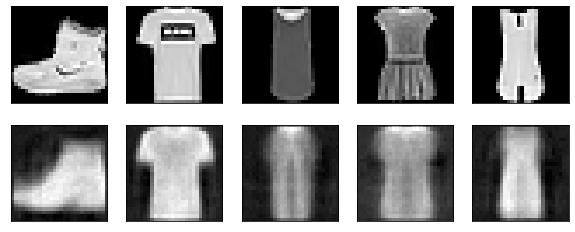

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.021898
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.023228
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.019269
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.021231
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.017935
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.021363
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.016331
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.016455
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.018775
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.015867
[Epoch 2]


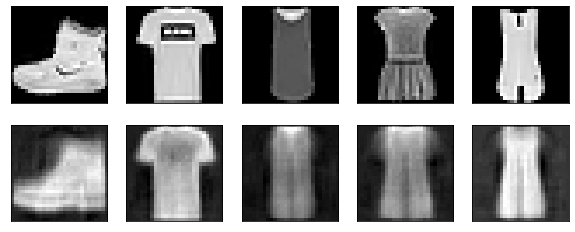

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.018473
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.016129
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.014233
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.016513
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.015174
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.016452
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.016780
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.017910
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.014239
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.015595
[Epoch 3]


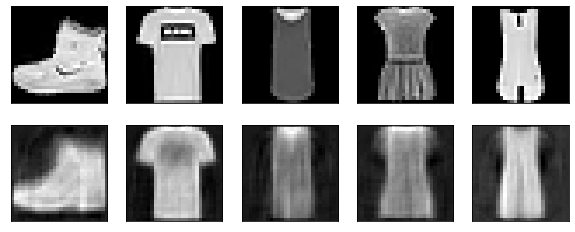

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.013125
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.014137
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.013461
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.014531
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.014362
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.012601
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.014561
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.013855
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.014293
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.014245
[Epoch 4]


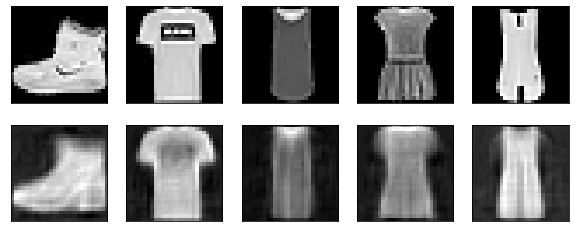

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.012929
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.012446
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.012837
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.014016
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.011996
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.014071
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.010921
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.013740
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.011543
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.012035
[Epoch 5]


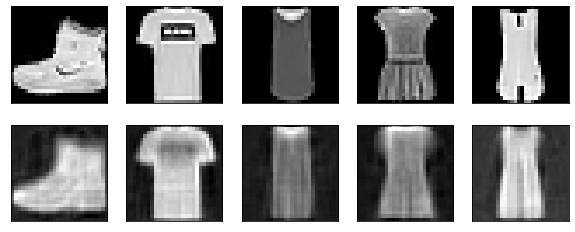

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.011071
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.014198
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.011855
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.011527
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.011967
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.011869
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.010378
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.011475
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.012533
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.010404
[Epoch 6]


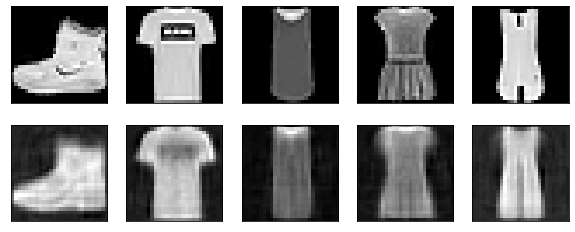

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.012326
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.011345
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.012011
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.013100
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.012317
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.012385
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.011582
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.012168
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.010852
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.012733
[Epoch 7]


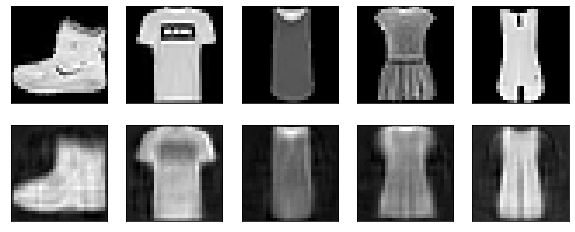

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.010893
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.010689
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.012075
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.012426
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.009863
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.011431
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.010252
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.011292
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.011593
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.010375
[Epoch 8]


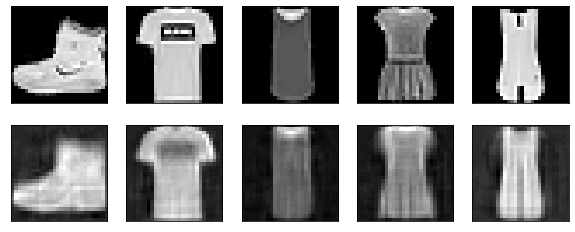

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.009832
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.011346
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.010845
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.010486
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.012134
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.010470
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.011197
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.010592
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.009566
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.012141
[Epoch 9]


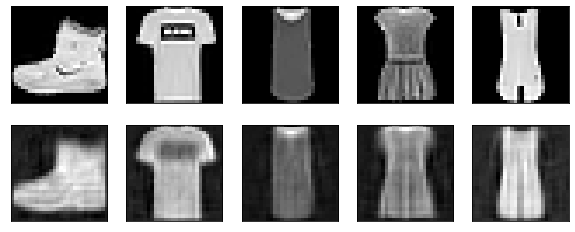

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.011620
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.013042
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.009654
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.011545
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.011033
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.010972
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.010138
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.010076
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.009673
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.010028
[Epoch 10]


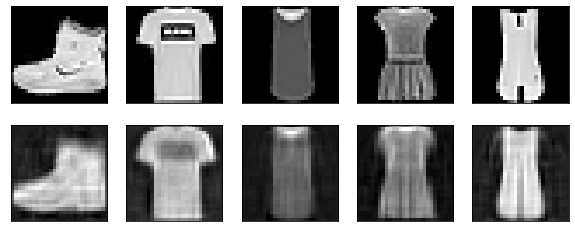

In [6]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Sigmoid(),
            nn.Linear(128, 64),
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.Sigmoid(),
            nn.Linear(128, 28*28),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

model = AE().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr = 0.005)
criterion = nn.MSELoss()

print("Model: ", model)
print("Device: ", DEVICE)

EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_x = view_data.to(DEVICE)
    encoded_data, decoded_data = model(test_x)
    f, a = plt.subplots(2, 5, figsize = (10, 4))
    print("[Epoch {}]".format(epoch))
    for idx in range(5):
        img = np.reshape(view_data.data.numpy()[idx], (28, 28))
        a[0][idx].imshow(img, cmap = "gray")
        a[0][idx].set_xticks(())
        a[0][idx].set_yticks(())
        
    for idx in range(5):
        img = np.reshape(decoded_data.to("cpu").data.numpy()[idx], (28, 28))
        a[1][idx].imshow(img, cmap = "gray")
        a[1][idx].set_xticks(())
        a[1][idx].set_yticks(())
    plt.show()

Model:  AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=784, bias=True)
  )
)
Device:  cuda
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.203460
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.026690
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.023944
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.020305
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.016123
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.017088
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.017618
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.015188
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.014014
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.012867
[Epoch 1]


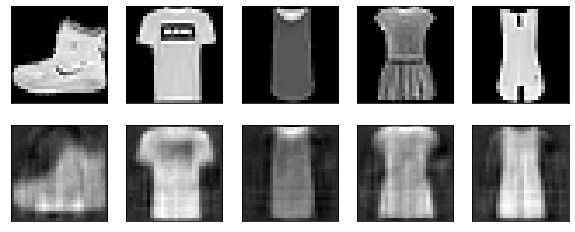

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.017532
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.014305
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.013756
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.011907
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.012082
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.012825
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.013061
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.013380
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.011695
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.014447
[Epoch 2]


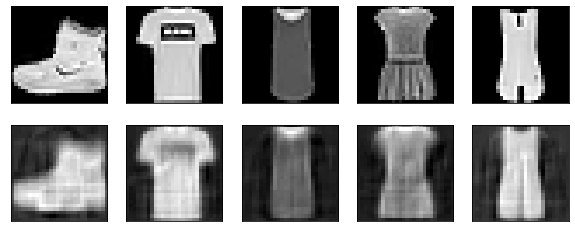

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.013808
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.012805
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.012216
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.013925
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.014651
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.013055
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.012118
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.013297
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.010960
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.012621
[Epoch 3]


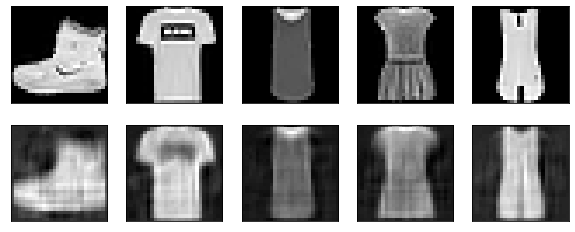

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.013248
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.012548
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.012373
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.013004
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.012754
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.013128
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.013430
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.012396
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.014740
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.012551
[Epoch 4]


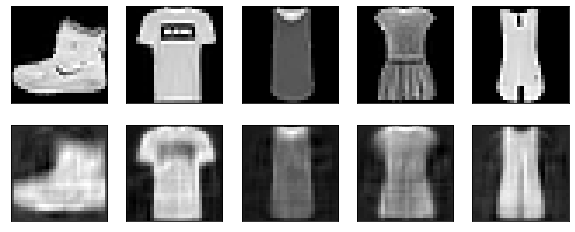

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.012254
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.011096
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.012374
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.012957
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.011619
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.012011
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.012230
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.012339
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.012282
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.012541
[Epoch 5]


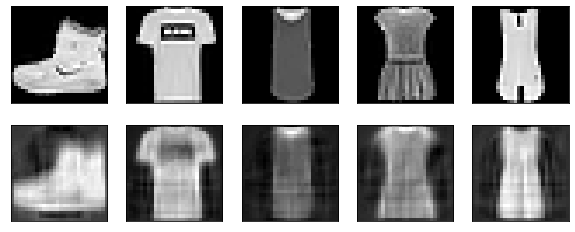

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.014664
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.012790
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.012053
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.013826
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.013233
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.011283
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.013251
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.011563
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.012354
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.013716
[Epoch 6]


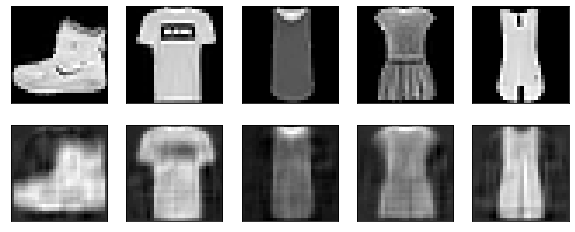

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.011941
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.011804
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.012318
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.011851
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.011994
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.011969
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.014347
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.012394
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.012677
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.012921
[Epoch 7]


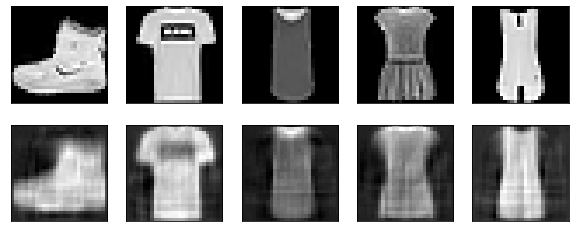

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.012492
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.011657
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.010798
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.010498
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.012008
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.013363
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.013445
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.011674
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.014303
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.012677
[Epoch 8]


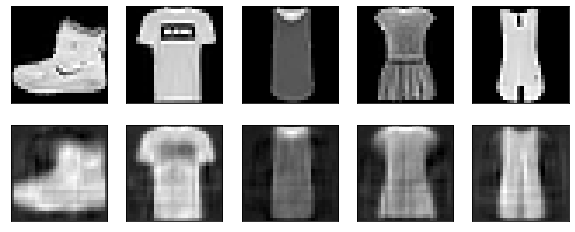

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.014811
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.013106
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.013075
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.013093
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.012239
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.013277
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.011461
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.013475
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.012106
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.013646
[Epoch 9]


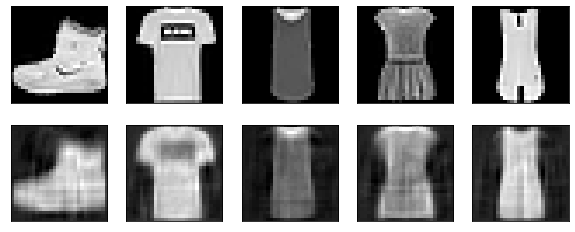

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.011439
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.011501
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.013417
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.012080
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.012862
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.013784
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.012411
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.014949
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.011689
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.011962
[Epoch 10]


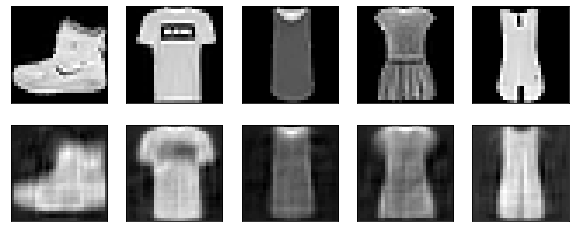

In [7]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

model = AE().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr = 0.005)
criterion = nn.MSELoss()

print("Model: ", model)
print("Device: ", DEVICE)

EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_x = view_data.to(DEVICE)
    encoded_data, decoded_data = model(test_x)
    f, a = plt.subplots(2, 5, figsize = (10, 4))
    print("[Epoch {}]".format(epoch))
    for idx in range(5):
        img = np.reshape(view_data.data.numpy()[idx], (28, 28))
        a[0][idx].imshow(img, cmap = "gray")
        a[0][idx].set_xticks(())
        a[0][idx].set_yticks(())
        
    for idx in range(5):
        img = np.reshape(decoded_data.to("cpu").data.numpy()[idx], (28, 28))
        a[1][idx].imshow(img, cmap = "gray")
        a[1][idx].set_xticks(())
        a[1][idx].set_yticks(())
    plt.show()

In [9]:
# !pip install lightgbm
# !pip install time
import time
import lightgbm as lgb
from sklearn.metrics import accuracy_score
start = time.time() 
lgb_dtrain = lgb.Dataset(data = trainset.train_data.view(-1, 28 * 28).numpy(), label = list(trainset.train_labels.numpy()))
lgb_param = {'max_depth': 10,
            'learning_rate': 0.001,
            'n_estimators': 20,
            'objective': 'multiclass',
            'num_class': len(set(list(trainset.train_labels.numpy()))) + 1}

num_round = 10000
lgb_model = lgb.train(params = lgb_param, num_boost_round = num_round, train_set = lgb_dtrain) 
lgb_model_predict = np.argmax(lgb_model.predict(trainset.train_data.view(-1, 28 * 28).numpy()), axis = 1) 
print("Accuracy: %.2f" % (accuracy_score(list(trainset.train_labels.numpy()), lgb_model_predict) * 100), "%") 
print("Time: %.2f" % (time.time() - start), "seconds")

Accuracy: 82.84 %
Time: 24.19 seconds


In [10]:
trainset.train_labels.numpy()

array([9, 0, 0, ..., 3, 0, 5], dtype=int64)

In [11]:
trainset.train_data.view(-1, 28 * 28).numpy()[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [13]:
train_encoded_x = trainset.train_data.view(-1, 28 * 28).to(DEVICE)
train_encoded_x = train_encoded_x.type(torch.FloatTensor)
train_encoded_x = train_encoded_x.to(DEVICE)
encoded_data, decoded_data = model(train_encoded_x)
encoded_data = encoded_data.to("cpu")

start = time.time() 
lgb_dtrain = lgb.Dataset(data = encoded_data.detach().numpy(), label = list(trainset.train_labels.numpy()))
lgb_param = {'max_depth': 10,
            'learning_rate': 0.001,
            'n_estimators': 20,
            'objective': 'multiclass',
            'num_class': len(set(list(trainset.train_labels.numpy()))) + 1}

num_round = 10000
lgb_model = lgb.train(params = lgb_param, num_boost_round = num_round, train_set = lgb_dtrain) 
lgb_model_predict = np.argmax(lgb_model.predict(encoded_data.detach().numpy()), axis = 1)
print("Accuracy: %.2f" % (accuracy_score(list(trainset.train_labels.numpy()), lgb_model_predict) * 100), "%") 
print("Time: %.2f" % (time.time() - start), "seconds") 

Accuracy: 76.34 %
Time: 2.98 seconds


In [14]:
encoded_data.detach().numpy()[0]

array([-0.6295621 ,  0.3981959 , -0.3102438 , -0.74822354,  0.16847013,
       -0.56228316, -2.3489547 ,  0.6802591 , -0.13199516,  0.39822114,
        0.21409158,  0.32031706, -0.44754875, -0.39179066, -0.3295825 ,
       -0.591706  , -0.3091961 ,  0.15201877,  0.9125538 , -0.7695201 ,
       -0.28642774,  0.5129681 , -0.5386443 ,  0.16092938, -0.27252102,
       -0.07355258,  0.38153502,  0.22633193, -0.6614268 , -0.2918711 ,
        0.3922338 , -0.08538774,  0.5821891 , -2.7595336 ,  0.31545886,
        0.23639181,  0.00845613, -0.43755597, -0.6935822 , -1.0944967 ,
        0.04953695, -0.23403467,  0.4962907 ,  1.1197108 ,  0.07138865,
       -0.04796794,  0.35757726, -0.5690938 , -0.21324523, -0.27022046,
       -0.5907175 ,  0.13732643,  0.02851973,  0.54242754,  0.44837177,
       -0.8713331 ,  0.5567852 ,  0.32828125,  1.0348943 ,  0.49005607,
       -0.03277013,  0.05863023,  1.4344603 ,  0.9858666 ], dtype=float32)